In [ ]:
from torchvision import models
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torch.utils.data import DataLoader
import segmentation_models_pytorch as smp
import torch
import pandas as pd
import numpy as np
import os
import cv2

In [ ]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

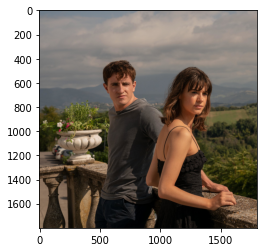

In [3]:
path = 'futopyshi/data/samples/3123.jpg'

img = Image.open(path)
plt.imshow(img)
plt.show()

In [4]:
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(),
                 T.Normalize(mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225])])

inp = trf(img).unsqueeze(0)

In [5]:
# move the input and model to GPU for speed if available
%time
if torch.cuda.is_available():
    inp = inp.to('cuda')
    fcn.to('cuda')

with torch.no_grad():
    output = fcn(inp)['out'][0]
output_predictions = output.argmax(0)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.9 µs


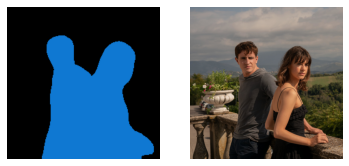

In [6]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(img.size)
r.putpalette(colors)

fig, ax = plt.subplots(1, 2)
ax[0].axis('off'), ax[1].axis('off')
ax[0].imshow(r)
ax[1].imshow(img)
plt.show()

In [7]:
print('Tensor format is (Batch x RGB x H x W)')
print(inp.shape)

Tensor format is (Batch x RGB x H x W)
torch.Size([1, 3, 224, 224])
